In [2]:
import os
import numpy as np
import matplotlib
import pandas as pd
from matplotlib import pyplot as plt
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
import seaborn as sns
sns.set_style('white')
import dataframe_image as dfi
import pickle
from network_setup import *
from data_setup import *
from EnergyCommunityModel import *
from model_eval import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

# set up home path
#home_path = os.getcwd()

In [5]:
# set up simulation scope
input_cdir_timestamp = '2022 11 09 10h46m56s'
basepath = os.path.join(os.getcwd(), '02_implementation\energy_model')
with open(os.path.join(basepath,'2022_11_13_filepaths.pickle'), 'rb') as handle:
    paths = pickle.load(handle)
date_t = '2022 12 16 20h00m'
n_steps = 96*7

# define comprehensive scenario settings for analysis
scenario_sc0 = {'seasons': ['summer', 'winter'], 'p2p_options': [False], 'pr_years': [2019, 2022], 'pr_dynamic_options': [False]}
scenario_sc1 = {'seasons': ['summer', 'winter'], 'p2p_options': [False], 'pr_years': [2019, 2022], 'pr_dynamic_options': [True]}
scenario_sc2 = {'seasons': ['summer', 'winter'], 'p2p_options': [True], 'pr_years': [2019, 2022], 'pr_dynamic_options': [True]}
scenario_dict = {'scenario_0': scenario_sc0, 'scenario_1': scenario_sc1, 'scenario_2': scenario_sc2}

# manually define all scenarios
scenario_0 = {'seasons': ['summer'], 'p2p_options': [False], 'pr_years': [2019], 'pr_dynamic_options': [False]}
scenario_1 = {'seasons': ['winter'], 'p2p_options': [False], 'pr_years': [2019], 'pr_dynamic_options': [False]}
scenario_2 = {'seasons': ['summer'], 'p2p_options': [False], 'pr_years': [2022], 'pr_dynamic_options': [False]}
scenario_3 = {'seasons': ['winter'], 'p2p_options': [False], 'pr_years': [2022], 'pr_dynamic_options': [False]}

scenario_4 = {'seasons': ['summer'], 'p2p_options': [False], 'pr_years': [2019], 'pr_dynamic_options': [True]}
scenario_5 = {'seasons': ['winter'], 'p2p_options': [False], 'pr_years': [2019], 'pr_dynamic_options': [True]}
scenario_6 = {'seasons': ['summer'], 'p2p_options': [False], 'pr_years': [2022], 'pr_dynamic_options': [True]}
scenario_7 = {'seasons': ['winter'], 'p2p_options': [False], 'pr_years': [2022], 'pr_dynamic_options': [True]}

scenario_8 = {'seasons': ['summer'], 'p2p_options': [True], 'pr_years': [2019], 'pr_dynamic_options': [True]}
scenario_9 = {'seasons': ['winter'], 'p2p_options': [True], 'pr_years': [2019], 'pr_dynamic_options': [True]}
scenario_10 = {'seasons': ['summer'], 'p2p_options': [True], 'pr_years': [2022], 'pr_dynamic_options': [True]}
scenario_11 = {'seasons': ['winter'], 'p2p_options': [True], 'pr_years': [2022], 'pr_dynamic_options': [True]}

all_scs = [scenario_0, scenario_1, scenario_2, scenario_3, scenario_4, scenario_5, 
           scenario_6, scenario_7, scenario_8, scenario_9, scenario_10, scenario_11]

#### Plot aggregated use case measures

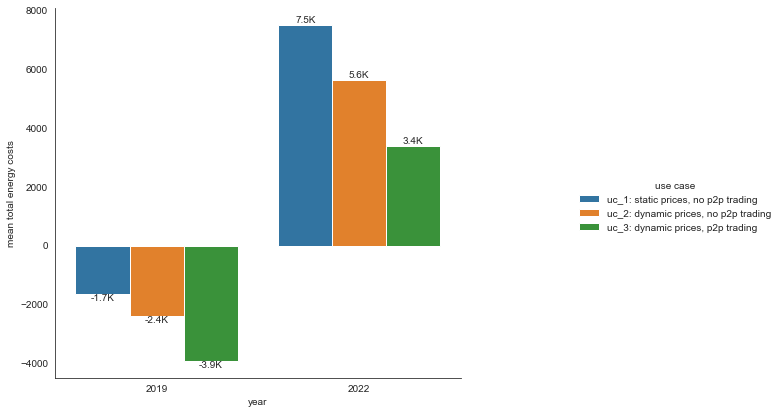

In [6]:
sc_dict, measure = all_scs, 'welfare'
df = get_quick_measure_kpis(paths, date_t, scenarios = sc_dict, measure = measure)

df_temp = df.groupby(['year', 'use case'])['total_costs_all'].mean().reset_index(name='mean total energy costs')

g = sns.catplot(data=df_temp, y='mean total energy costs', x='year', hue='use case', kind='bar')
g.fig.set_size_inches(12,6)
# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)
# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_height() / 1000):.1f}K' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

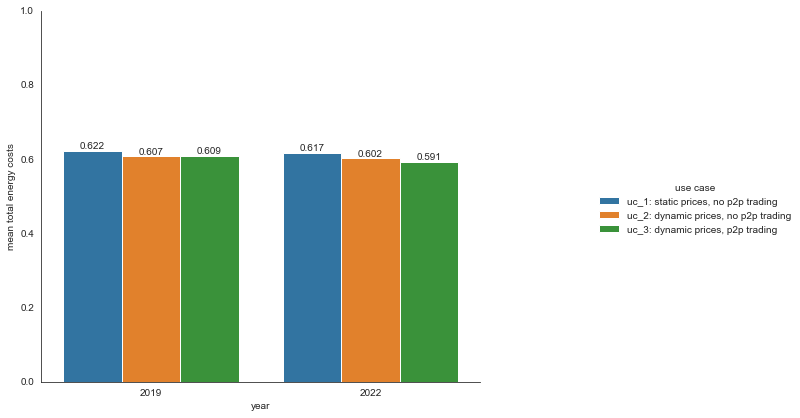

In [7]:
df_temp = df.groupby(['year', 'use case'])['mean_gini'].mean().reset_index(name='mean total energy costs')

g = sns.catplot(data=df_temp, y='mean total energy costs', x='year', hue='use case', kind='bar')
g.fig.set_size_inches(12,6)
g.ax.set_ylim(0,1)
# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)
# iterate through the axes containers
for c in ax.containers:
    labels = [f'{round(v.get_height(),3)}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

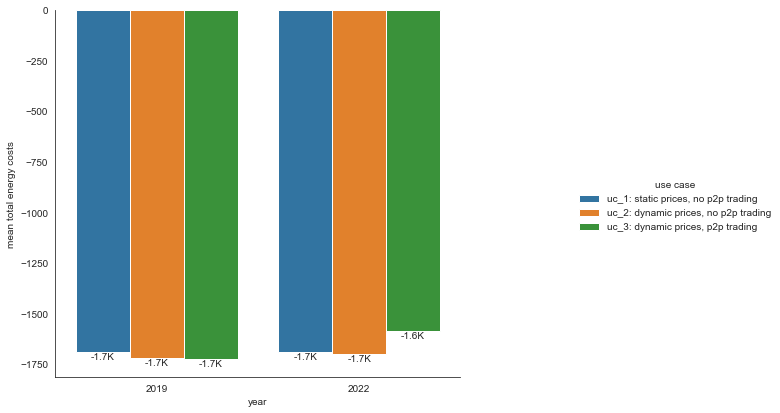

In [8]:
sc_dict, measure = all_scs, 'stability'
df = get_quick_measure_kpis(paths, date_t, scenarios = sc_dict, measure = measure)

df_temp = df.groupby(['year', 'use case'])['total_net_grid_demand'].mean().reset_index(name='mean total energy costs')
g = sns.catplot(data=df_temp, y='mean total energy costs', x='year', hue='use case', kind='bar')
g.fig.set_size_inches(12,6)
# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)
# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_height() / 1000):.1f}K' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

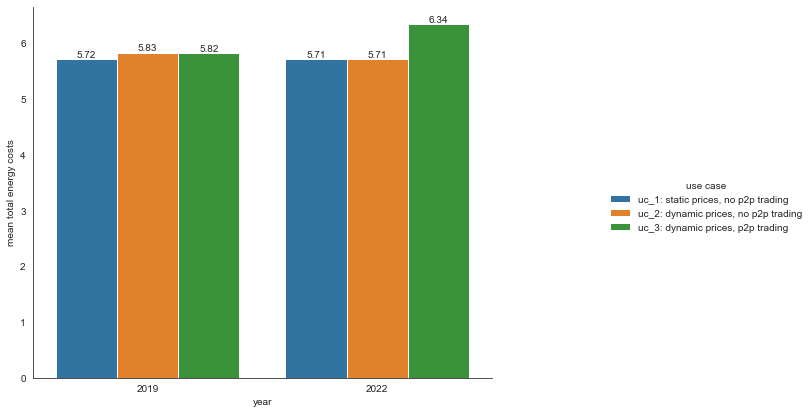

In [9]:
df_temp = df.groupby(['year', 'use case'])['std_net_grid_demand'].mean().reset_index(name='mean total energy costs')
g = sns.catplot(data=df_temp, y='mean total energy costs', x='year', hue='use case', kind='bar')
g.fig.set_size_inches(12,6)
# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)
# iterate through the axes containers
for c in ax.containers:
    labels = [f'{round(v.get_height(),2)}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

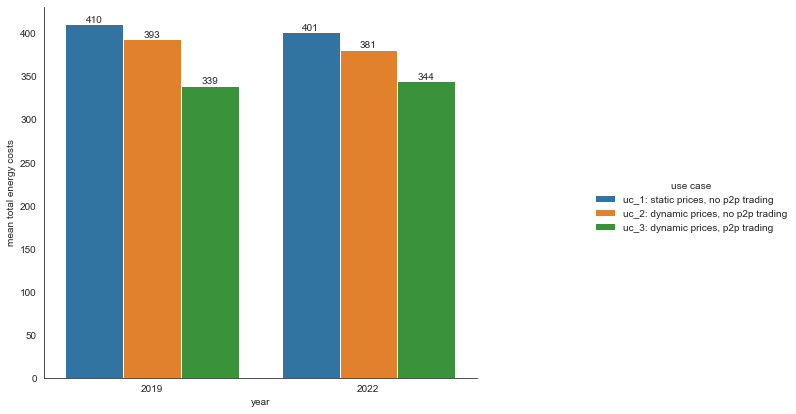

In [10]:
sc_dict, measure = all_scs, 'sustainability'
df = get_quick_measure_kpis(paths, date_t, scenarios = sc_dict, measure = measure)

df_temp = df.groupby(['year', 'use case'])['total kgCO2e_all'].mean().reset_index(name='mean total energy costs')
g = sns.catplot(data=df_temp, y='mean total energy costs', x='year', hue='use case', kind='bar')
g.fig.set_size_inches(12,6)
# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)
# iterate through the axes containers
for c in ax.containers:
    labels = [f'{round(v.get_height())}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

---

#### Comparing the three use cases for each scenario (3x1 graph)
here, ```measure``` can be in [welfare, stability, sustainability]

,year,season,price,p2p,use case,total kgCO2e_all,total_kgCO2e_prosumer,total_kgCO2e_consumer,mean_CO2e_gini
sc0,2022,winter,static,disabled,"uc_1: static prices, no p2p trading",359.131422,142.555011,216.576412,0.282208
sc1,2022,winter,dynamic,disabled,"uc_2: dynamic prices, no p2p trading",342.611959,137.677937,204.934022,0.269504
sc2,2022,winter,dynamic,enabled,"uc_3: dynamic prices, p2p trading",323.386275,156.209969,167.176306,0.280088


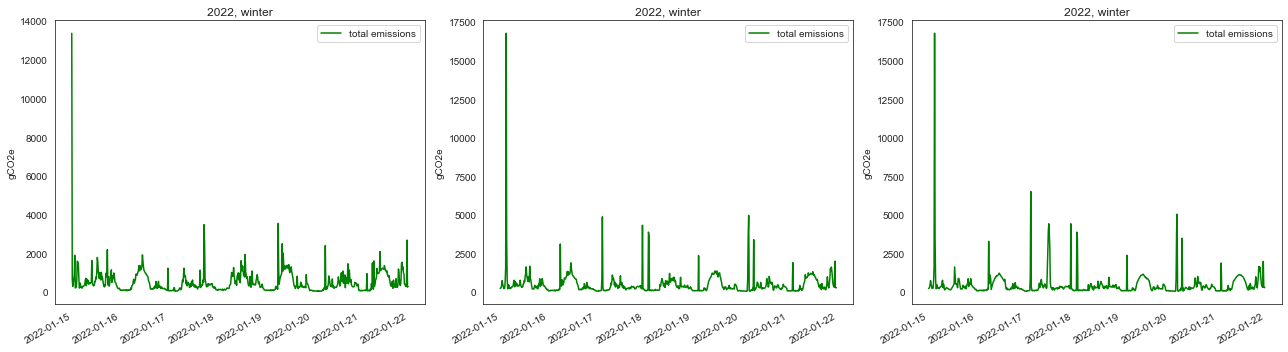

In [11]:
sc_dict, measure = [scenario_3, scenario_7, scenario_11], 'sustainability'
fig = plot_three_scenarios(paths, date_t, scenarios=sc_dict, measure=measure)
df = get_quick_measure_kpis(paths, date_t, scenarios = sc_dict, measure = measure)
np.round(df,2)

---

#### Comparing all use cases and scenarios for each measure (3x4 graph)
here, ```measure``` can be in [welfare, stability, sustainability]

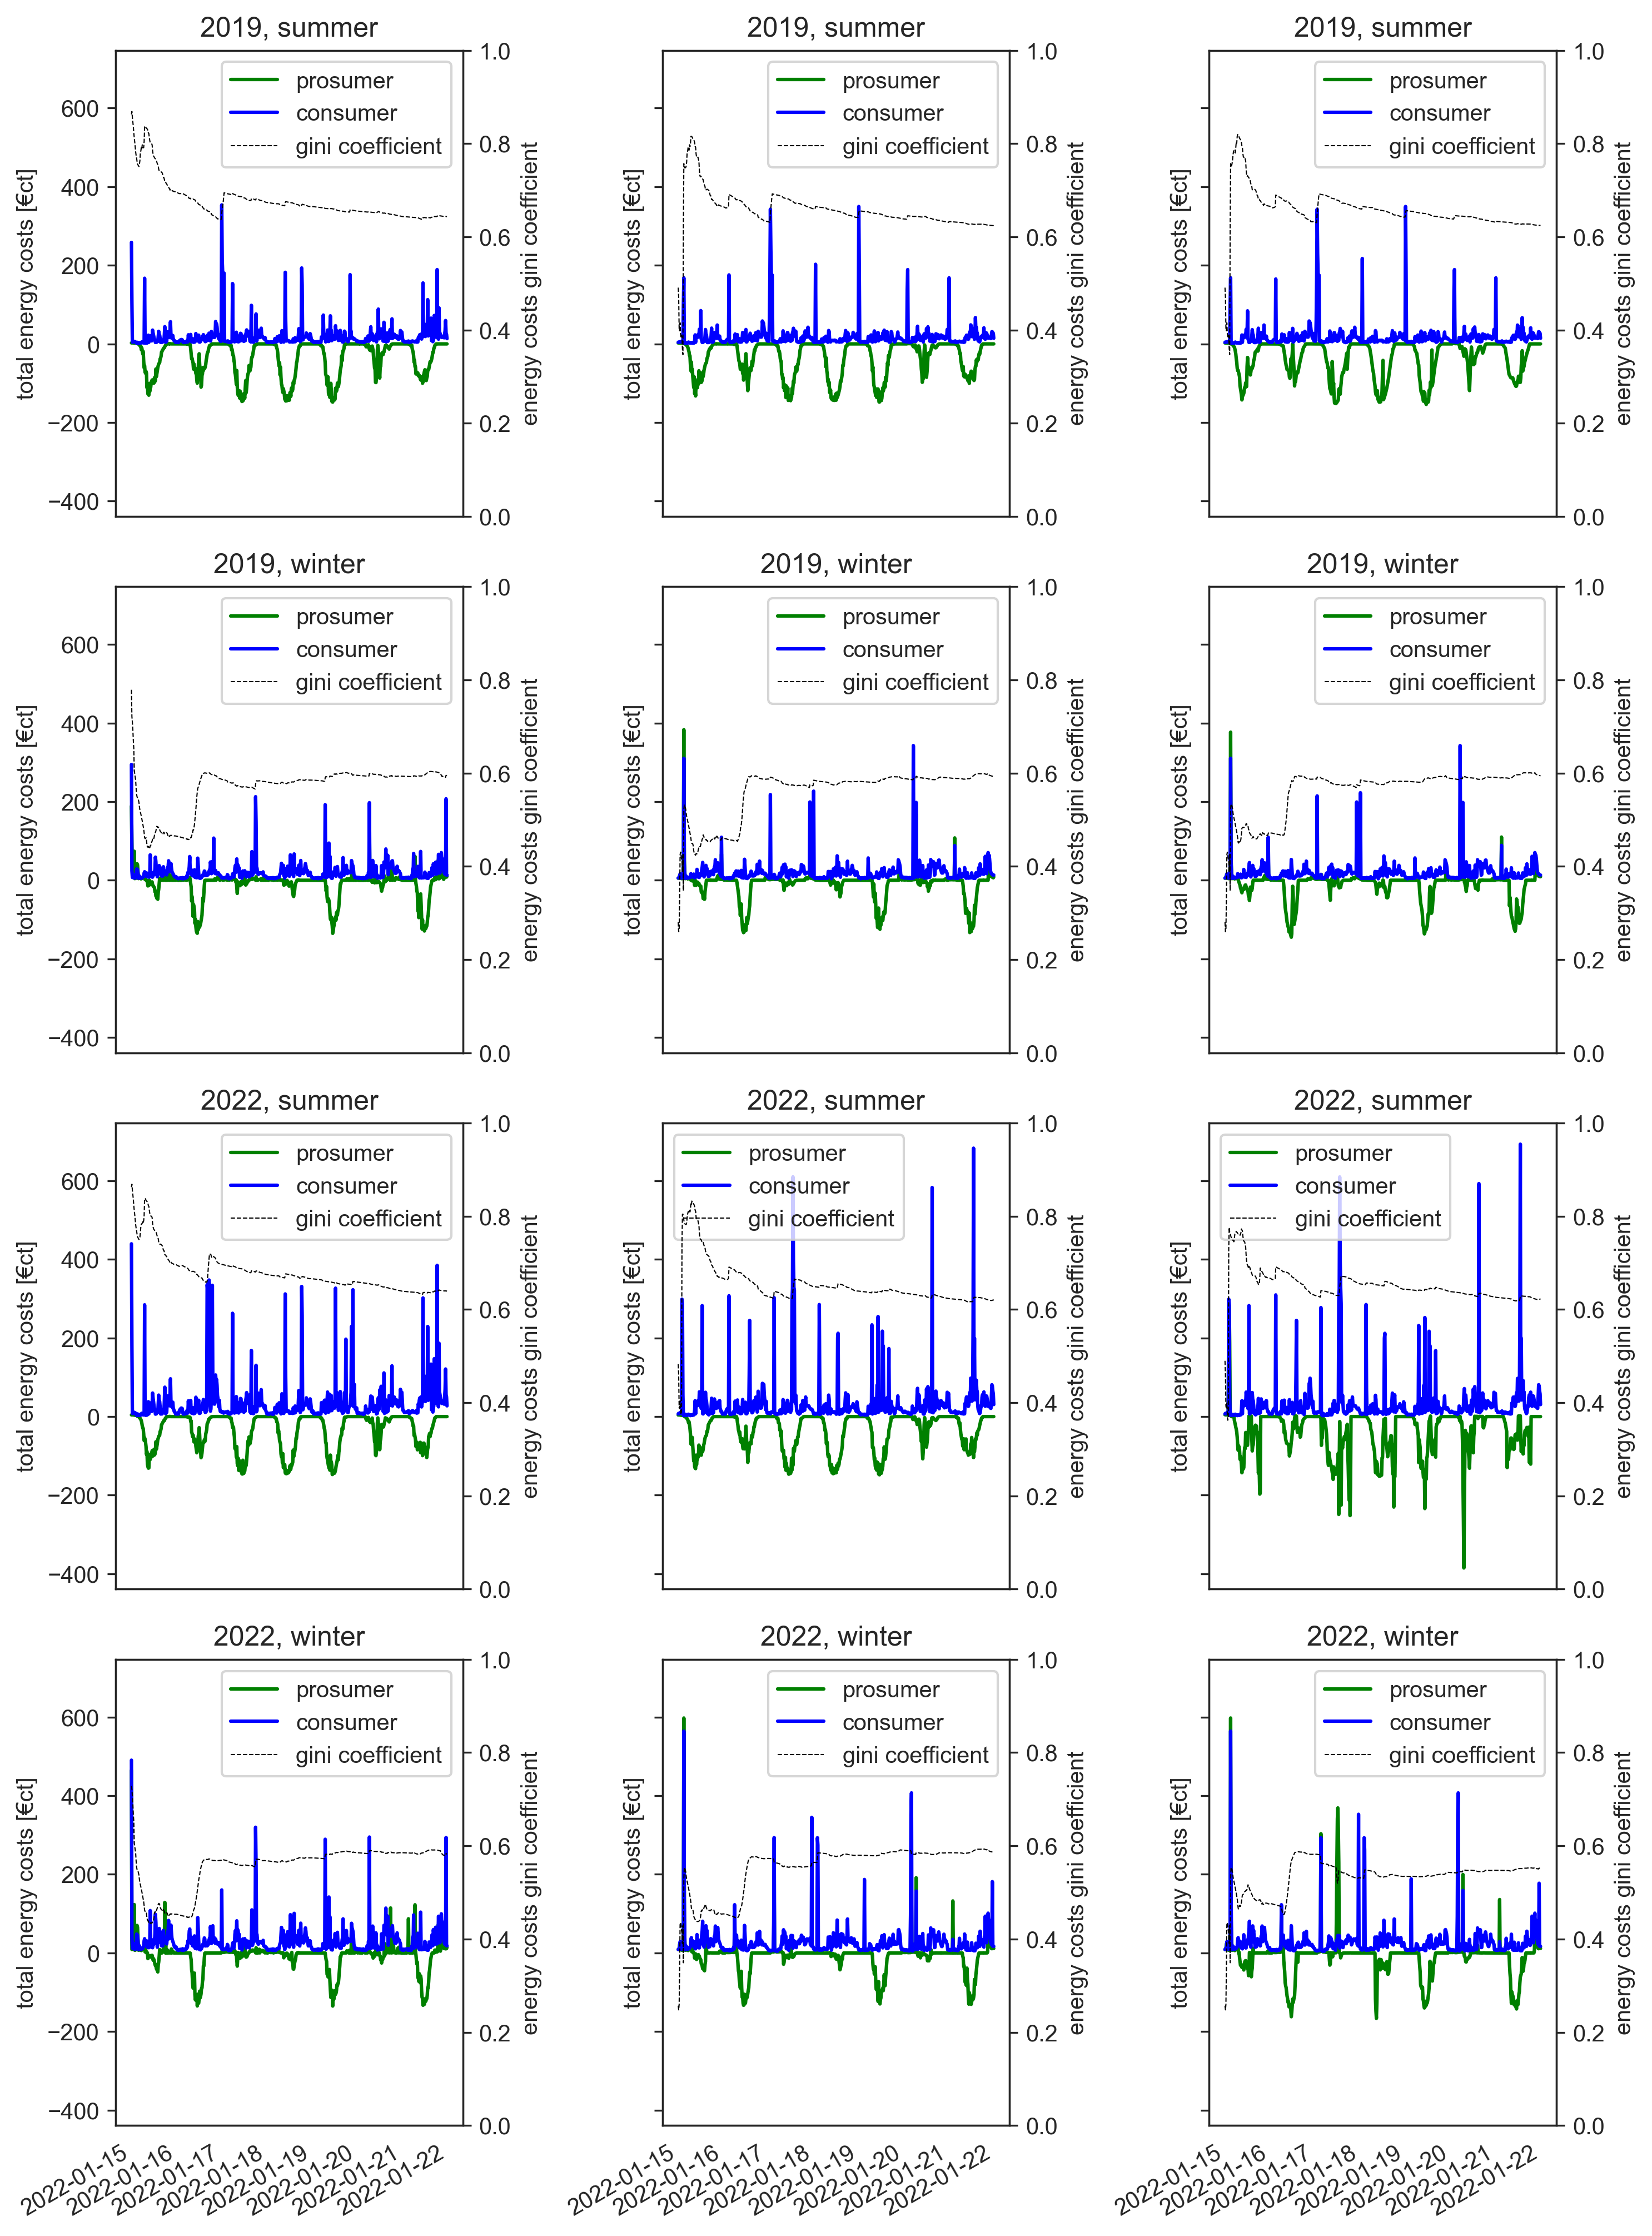

In [12]:
fig, ax = plot_all_scenarios(paths, date_t, scenario_dict, measure='welfare')
plt.gcf().set_dpi(300)

---